In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import datetime as dat
import matplotlib as plt
import datetime as dt
import xgboost as xgb
%matplotlib inline
sns.set()

In [2]:
features_ventana1 = pd.read_csv('../xgb/features_installs_lucas_ventana1.csv').set_index('ref_hash')
aux_ventana1 = pd.read_csv('../xgb/features_events_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', lsuffix = '_installs', rsuffix = '_events')
aux_ventana1 = pd.read_csv('../xgb/features_clicks_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1=features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_clicks')
aux_ventana1 = pd.read_csv('../xgb/features_auctions_lucas_ventana1.csv').set_index('ref_hash')
features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
#features_ventana1 = features_ventana1.fillna(0)
labels_sc_ventana1 = pd.read_csv('../xgb/labels_sc_ventana1.csv').set_index('ref_hash')
ventana1 = features_ventana1.join(labels_sc_ventana1, how = 'left')
#ventana1['tiempo_hasta_aparicion']=ventana1['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
#ventana1_no_convirtio.head()

ventana1_no_conversion=ventana1.loc[ventana1['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana1_conversion=ventana1.loc[np.logical_not(ventana1['tiempo_hasta_aparicion'].isna())].copy()

In [3]:
tamanio_muestra_ventana1=ventana1_conversion.shape[0]

In [4]:
ventana1_no_conversion['tiempo_hasta_aparicion']=ventana1_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana1_no_conversion=ventana1_no_conversion.sample(n=int(tamanio_muestra_ventana1*1), replace=True, random_state=662)
ventana1=ventana1_conversion.append(ventana1_no_conversion)

In [5]:
#personas_convertidas=features_ventana1.index.to_list()

#criterio=np.logical_not(ventana1_no_convirtio.index.isin(personas_convertidas))

#ventana1_no_convirtio.head()
#ventana1_no_convirtio=ventana1_no_convirtio.loc[criterio]
labels_sc_ventana1 = pd.read_csv('../xgb/labels_sc_ventana1.csv').set_index('ref_hash')
#ventana1 = features_ventana1.join(labels_sc_ventana1, how = 'left').fillna(259200)#3 dias pasado a segundos
#ventana1_no_convirtio.head()

In [6]:
features_ventana2 = pd.read_csv('../xgb/features_installs_lucas_ventana2.csv').set_index('ref_hash')
aux_ventana2 = pd.read_csv('../xgb/features_events_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'outer', lsuffix = '_installs', rsuffix = '_events')
aux_ventana2 = pd.read_csv('../xgb/features_clicks_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2=features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_clicks')
aux_ventana2 = pd.read_csv('../xgb/features_auctions_lucas_ventana2.csv').set_index('ref_hash')
features_ventana2.join(aux_ventana2, how = 'outer', rsuffix = '_auctions')
#features_ventana2 = features_ventana2.fillna(0)

labels_sc_ventana2 = pd.read_csv('../xgb/labels_sc_ventana2.csv').set_index('ref_hash')
ventana2 = features_ventana2.join(labels_sc_ventana2, how = 'left')
#ventana2['tiempo_hasta_aparicion']=ventana2['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos




ventana2_no_conversion=ventana2.loc[ventana2['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana2_conversion=ventana2.loc[np.logical_not(ventana2['tiempo_hasta_aparicion'].isna())].copy()

tamanio_muestra_ventana2=ventana2_conversion.shape[0]

ventana2_no_conversion['tiempo_hasta_aparicion']=ventana2_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana2_no_conversion=ventana2_no_conversion.sample(n=int(tamanio_muestra_ventana2*0.5), replace=True, random_state=662)
ventana2=ventana2_conversion.append(ventana2_no_conversion)

In [7]:
features_ventana3 = pd.read_csv('../xgb/features_installs_lucas_ventana3.csv').set_index('ref_hash')
aux_ventana3 = pd.read_csv('../xgb/features_events_lucas_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', lsuffix = '_installs', rsuffix = '_events')
aux_ventana3 = pd.read_csv('../xgb/features_clicks_lucas_ventana3.csv').set_index('ref_hash')
features_ventana3=features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_clicks')

#aux_ventana3 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana3.csv').set_index('ref_hash')
#features_ventana3.join(aux_ventana3, how = 'outer', rsuffix = '_auctions')
#features_ventana3 = features_ventana3.fillna(0)

labels_sc_ventana3 = pd.read_csv('../xgb/labels_sc_ventana3.csv').set_index('ref_hash')
#ventana3['tiempo_hasta_aparicion']=ventana3['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana3 = features_ventana3.join(labels_sc_ventana3, how = 'outer')

ventana3_no_conversion=ventana3.loc[ventana3['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana3_conversion=ventana3.loc[np.logical_not(ventana3['tiempo_hasta_aparicion'].isna())].copy()





tamanio_muestra_ventana3=ventana3_conversion.shape[0]
ventana3_no_conversion['tiempo_hasta_aparicion']=ventana3_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana3_no_conversion=ventana3_no_conversion.sample(n=int(tamanio_muestra_ventana3*0.5), replace=True, random_state=662)
ventana3=ventana3_conversion.append(ventana3_no_conversion)
tamanio_muestra_ventana3

133885

In [8]:
features_ventana4 = pd.read_csv('../xgb/features_installs_lucas_ventana4.csv').set_index('ref_hash')
aux_ventana4 = pd.read_csv('../xgb/features_events_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', lsuffix = '_installs', rsuffix = '_events')
aux_ventana4 = pd.read_csv('../xgb/features_clicks_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4=features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_clicks')
aux_ventana4 = pd.read_csv('../xgb/features_auctions_lucas_ventana4.csv').set_index('ref_hash')
features_ventana4.join(aux_ventana4, how = 'outer', rsuffix = '_auctions')
#features_ventana4 = features_ventana4.fillna(0)

labels_sc_ventana4 = pd.read_csv('../xgb/labels_sc_ventana4.csv').set_index('ref_hash')
#ventana4['tiempo_hasta_aparicion']=ventana4['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos

ventana4 = features_ventana4.join(labels_sc_ventana4, how = 'left')




ventana4_no_conversion=ventana4.loc[ventana4['tiempo_hasta_aparicion'].isna()].copy()#personas que no convirtieron en esa ventana
ventana4_conversion=ventana4.loc[np.logical_not(ventana4['tiempo_hasta_aparicion'].isna())].copy()

tamanio_muestra_ventana4=ventana4_conversion.shape[0]

ventana4_no_conversion['tiempo_hasta_aparicion']=ventana4_no_conversion['tiempo_hasta_aparicion'].fillna(259200)#3 dias pasado a segundos
ventana4_no_conversion=ventana4_no_conversion.sample(n=int(tamanio_muestra_ventana4*0.5), replace=True, random_state=662)
ventana4=ventana4_conversion.append(ventana4_no_conversion)

In [9]:
matriz = ventana1.append(ventana2).append(ventana3).append(ventana4).reset_index('ref_hash')
filas = matriz.shape[0]
matriz.head(5)
matriz=matriz.drop(['attributed_min','attributed_max'],axis=1)
matriz.head()
matriz=matriz.drop('ref_hash',axis=1)

In [10]:
features = matriz.iloc[:,:-1]


In [11]:
labels = matriz.iloc[:,-1]
labels.head()

0    152024.805
1     81071.662
2     19452.720
3     93545.070
4    126487.858
Name: tiempo_hasta_aparicion, dtype: float64

In [12]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [13]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size=0.15, random_state=123)

In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 15,b_jobs=10, alpha = 10, n_estimators = 75)
#RMSE: 75931.459114
#RMSE ovrfiteado=38792.947847

In [15]:
xg_reg.fit(train_features,train_labels)

XGBRegressor(alpha=10, b_jobs=10, base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=0.3, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [16]:
predicted_labels = xg_reg.predict(test_features)

In [17]:
rmse = np.sqrt(mean_squared_error(test_labels, predicted_labels))
print("RMSE: %f" % (rmse))

RMSE: 75931.459114


In [18]:
predicted_labels.max()

254814.22

## Importancia de los features (cuantas veces aparecen en los árboles)

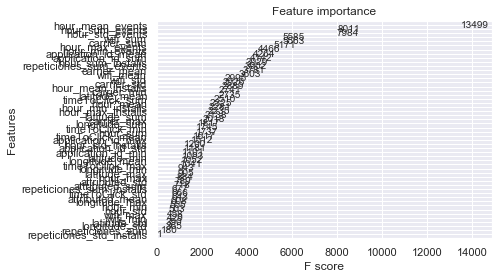

In [19]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 11]
plt.show()

In [20]:
features_ventana7 = pd.read_csv('../xgb/features_installs_lucas_ventana7.csv').set_index('ref_hash')
aux_ventana7 = pd.read_csv('../xgb/features_events_lucas_ventana7.csv').set_index('ref_hash')
features_ventana7=features_ventana7.join(aux_ventana7, how = 'left', lsuffix = '_installs', rsuffix = '_events')
aux_ventana7 = pd.read_csv('../xgb/features_clicks_lucas_ventana7.csv').set_index('ref_hash')
features_ventana7=features_ventana7.join(aux_ventana7, how = 'left', rsuffix = '_clicks')
#aux_ventana1 = pd.read_csv('../xgb/features_auctions_gonzalo_ventana1.csv').set_index('ref_hash')
#features_ventana1.join(aux_ventana1, how = 'outer', rsuffix = '_auctions')
#features_ventana7=features_ventana7.fillna(0)

labels_ventana7 = pd.read_csv('../xgb/base_target_sc.csv').set_index('ref_hash')
target = labels_ventana7

ventana7 = features_ventana7.join(labels_ventana7, how = 'right').fillna(0).reset_index().rename(index=str, columns={"device_id": "ref_hash"}) #3 dias pasado a segundos
ventana7.head()

ventana7=ventana7.drop('ref_hash',axis=1)


In [21]:
features_ventana7 = ventana7.iloc[:,:-1]
labels_ventana7 = ventana7.iloc[:,-1]

In [22]:
data_dmatrix = xgb.DMatrix(data=features,label=labels)

In [23]:
features_ventana7=features_ventana7.drop(['attributed_min','attributed_max'],axis=1)
predicted_target_labels = xg_reg.predict(features_ventana7)


In [24]:
target.shape

(4037, 1)

In [25]:
target['obj'] = predicted_target_labels

In [26]:
target=target.sort_values(by='obj')

In [27]:
target.to_csv('../xgb/target_sc.csv')